<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Parcial Práctico 1 - Grafos </h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>Flujo</p></h2>
  
  <p>
 Como se ha visto en clase, podemos emplear grafos dirigidos para representar flujos. En particular, hemos visto el algoritmo de Ford-Fulkerson que encuentra el flujo máximo de una red dada. Dado el pseudo-código que se incluía en las trasparencias de teoría (también aquí), se os pide que implementéis dicho algoritmo.
    
<img src='./img/ford-fulkerson_pseudo.png' >
    
</p>

In [9]:
import networkx as nx
from queue import Queue
'''
Dado un grafo y el flujo actual que circula por el mismo, esta función 
establece si algún camino todavía es posible.
'''
def exists_path(G,origen,destino):
    queue = Queue()
    queue.put(origen)
    trobat = False
    
    # Creamos un diccionario para guardar los nodos y sus padres
    parent = {n: None for n in G.nodes()}
    
    while (not queue.empty() and not trobat):
        current = queue.get()
        # Si el node actual es el de destino, encontramos el camino
        if current == destino: trobat = True
        for n in G[current]:
            if (not parent[n] and n != origen and G[current][n]['capacity'] > 0):
                queue.put(n)
                parent[n] = (current, n)
                
    return parent

'''
Dado un grafo dirigido, cuyas aristas tienen un atributo 'capacity', 
el cual indica cuánto flujo puede circular por ellas, un nodo fuente (source) y un nodo sumidero (target),
este algoritmo calcula el flujo máximo que puede circular desde s hasta t.
'''
def ford_fulkerson(G,s,t):
    # Create a residual Graph
    R = nx.DiGraph()
    
    for e1,e2 in G.edges():
        R.add_edge(e1,e2,capacity = G[e1][e2]['capacity'])
        R.add_edge(e2,e1,capacity = 0)
    
    max_flow = 0
    
    # Find first path
    dic = exists_path(R,s,t)
    print(dic)
    # Iterate while flow is still avaliable
    while dic[t]:
        
        # Find minimum flow in current path
        e = dic[t]
        min_flow = 2**32
        while e:
            min_flow = min(min_flow, R[e[0]][e[1]]['capacity'])
            # Cogemos el padre
            e = dic[e[0]]
            
        # Update flow
        e = dic[t]
        while e:
            R[e[0]][e[1]]['capacity'] -= min_flow
            R[e[1]][e[0]]['capacity'] += min_flow
            # Cogemos el padre
            e = dic[e[0]]
        
        max_flow += min_flow
        
        dic = exists_path(R,s,t)
    
    return max_flow, R

{0: None, 1: (0, 1), 2: (1, 2), 5: (1, 5), 3: (2, 3), 4: (5, 4), 6: (5, 6), 8: (4, 8), 9: (8, 9), 7: (6, 7)}
Flujo: 2 . Flujo Máx.: 2 EXITO!


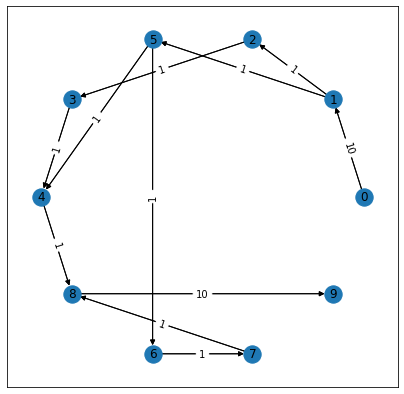

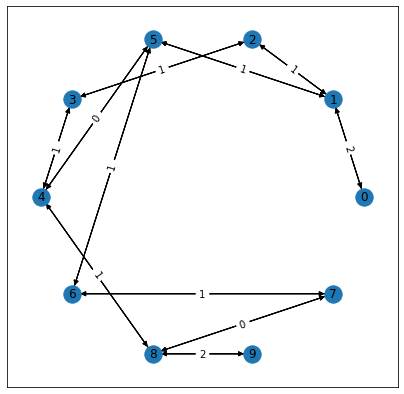

In [10]:
from utils import random_flow_graph, draw

# PRUEBA TU ALGORITMO!
graph,source,target,expected_sol = random_flow_graph(option=3) # Grafos dirigidos. Atributo 'capacity'
my_sol = ford_fulkerson(graph,source,target)
#draw(graph) # Un warning en rojo al ejecutar "draw()" es normal.
print("Flujo:",my_sol[0],". Flujo Máx.:",expected_sol,'EXITO!' if expected_sol == my_sol[0] else 'FALLO :(')
draw(graph)
draw(my_sol[1])

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios y análisis de complejidad</h3></p> </center> </div>


<b> <ul>
        <li> Explica brevemente (sobre el código, con comentarios) tu implementación. No es necesario comentar cada línea.</li>
        <li> ¿Qué estrategia has empleado para comprobar si se cumple la condición del bucle? </li> 
        <li> Analiza la complejidad de tu implementación </li>
    </ul>
</b>

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
Tenéis hasta las 21h para resolver el ejercicio. Se habilitará una tarea en el Campus Virtual pasada media hora desde el comienzo del examen. Una vez terminéis, subid el examen (<b>solo el notebook</b>) a la tarea "Primer parcial de pácticas" con vuestro nombre y el grupo de pácticas al que asistís:
</p>
<p>
```
[grupo_practicas]_[apellido]_[nombre]_AA_EXP1_Grafos.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_AA_EXP1_Grafos.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_AA_EXP1_Grafos.zip</li>
    
<li>ZX_Generico_Nombre_AA_EXP1_Grafos.ipynb</li>

<li>Ex1_Generico_Nombre_AA_EXP1_Grafos.rar</li>

<li>AA_EXP1_Grafos.ipynb</li>
<li> ... cualquier otra cosa</li>
</ul>
</p>
<b>Nota</b>: Podéis emplear funciones auxiliares si lo consideráis necesario. No obstante, la función principal a la que se llama debe ser la dada: <b> ford_fulkerson </b> con los parámetros que se establecen arriba <i>(G,s,t)</i> y la salida esperada, que es un entero indicando el flujo total que llega al nodo destino. Se penalizará el no cumplimiento de este estándar.
</div>